In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Function import *

In [2]:
books = pd.read_csv("Books.tsv", sep='\t', encoding= 'utf-8')

In [3]:
books.head()

,bookId,bookTitle,bookSeries,bookAuthors,ratingValue,ratingCount,reviewCount,Plot,NumberofPages,PublishingDate,Characters,Settings,url
0,1,The Hunger Games,(The Hunger Games #1),Suzanne Collins,4.33,6414062.0,172642.0,"Could you survive on your own in the wild, wit...",374.0,September 14th 2008,"Katniss Everdeen, Peeta Mellark, Cato, Primros...","District 12, Panem, Capitol, Panem, Panem",https://www.goodreads.com/book/show/2767052-th...
1,2,Harry Potter and the Order of the Phoenix,(Harry Potter #5),"J.K. Rowling, Mary GrandPré",4.50,2527943.0,42800.0,There is a door at the end of a silent corrido...,870.0,September 2004,"Sirius Black, Draco Malfoy, Ron Weasley, Petun...","Hogwarts School of Witchcraft and Wizardry, Lo...",https://www.goodreads.com/book/show/2.Harry_Po...
2,3,To Kill a Mockingbird,(To Kill a Mockingbird),Harper Lee,4.28,4531861.0,91898.0,The unforgettable novel of a childhood in a sl...,324.0,May 23rd 2006,"Scout Finch, Atticus Finch, Jem Finch, Arthur ...","Maycomb, Alabama",https://www.goodreads.com/book/show/2657.To_Ki...
3,4,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen",4.26,3021022.0,67901.0,Alternate cover edition of ISBN 9780679783268 ...,279.0,October 10th 2000,"Mr. Bennet, Mrs. Bennet, Jane Bennet, Elizabet...","United Kingdom, Derbyshire, England, England, ...",https://www.goodreads.com/book/show/1885.Pride...
4,5,Twilight,(The Twilight Saga #1),Stephenie Meyer,3.60,4994449.0,104981.0,About three things I was absolutely positive. ...,501.0,September 6th 2006,"Edward Cullen, Jacob Black, Laurent, Renee, Be...","Forks, Washington, Phoenix, Arizona, Washingto...",https://www.goodreads.com/book/show/41865.Twil...


As shown below 16662 do not have Series value, we drop them all

In [4]:
books.isna().sum()

bookId                0
bookTitle            20
bookSeries        16662
bookAuthors          20
ratingValue          20
ratingCount          20
reviewCount          20
Plot                598
NumberofPages      1158
PublishingDate      788
Characters        20348
Settings          21919
url                   0
dtype: int64

In [5]:
books = books.dropna(subset=['bookSeries'])
books.reset_index(inplace = True, drop = True)

In order to delate the single books that contain in them the entire book seriesd. We use the check_single_book function to detect them and we do not select them using the uniqueBookFlag column.


In [6]:
books.bookSeries = books.bookSeries.apply(lambda x: replace_all(x,['(', ')']))
books['uniqueBookFlag'] = books.bookSeries.apply(lambda x: check_single_book(x))
books = books[books.uniqueBookFlag == 1]
# standardize the book Series names
books.bookSeries = books.bookSeries.apply(lambda x: clean_series(x))

We select only the book written in english

In [7]:
books['lang'] = books['Plot'].apply(detect_stable)
books = books[books.lang == 'en']
books.reset_index(inplace = True, drop = True)

We select only the series composed of more than one book


In [8]:
books['nrBooksPerSeries'] = books.bookSeries.apply(lambda x: nrBooksPerSeries(books, x))
books = books.loc[(books.nrBooksPerSeries) > 1]

We decided to pick the first ten book in order of appearence by computing the mean appereance value of the entire series

In [9]:
books['bookOrderAppearance'] = [i+1 for i in books.index]

In [10]:
books.groupby(['bookSeries'], as_index = False).agg({'bookOrderAppearance': 'mean'})\
.sort_values(by = 'bookOrderAppearance')[['bookSeries', 'bookOrderAppearance']][:10]

,bookSeries,bookOrderAppearance
37,Adventures of Tom and Huck,29.000000
1796,The Infernal Devices,66.333333
610,Fifty Shades,114.000000
1839,The Lord of the Rings,148.000000
1873,The Mortal Instruments,151.166667
802,"Hush, Hush",194.750000
1655,The Chronicles of Narnia Publication Order,202.500000
809,If I Stay,205.500000
1882,The Notebook,211.000000
1970,The Six of Crows Trilogy,229.000000


In [11]:
#collecting the first ten book series
Series = books.groupby(['bookSeries'], as_index = False).agg({'bookOrderAppearance': 'mean'})\
.sort_values(by = 'bookOrderAppearance').bookSeries[:10].values

In [12]:
book_analysis = books[books.bookSeries.isin(Series)].copy()

In [13]:
# processing year 
book_analysis.PublishingDate = book_analysis.PublishingDate.apply(pd.to_datetime)
book_analysis.PublishingDate = book_analysis.PublishingDate.apply(lambda x: x.year)
book_analysis.PublishingDate = book_analysis.PublishingDate - book_analysis.PublishingDate.min()

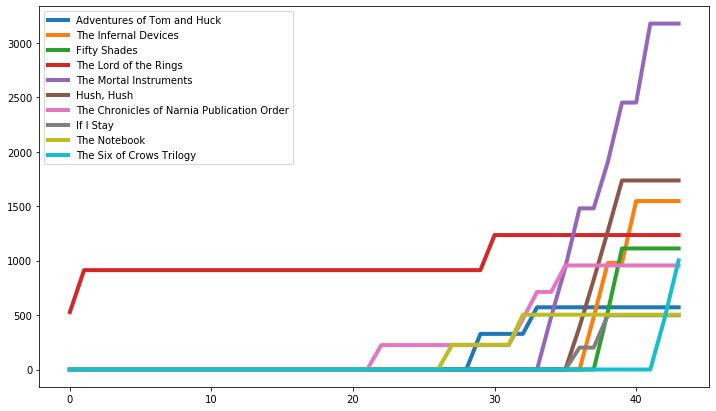

In [27]:
Plot_Cumulative_page(Series, book_analysis)